In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')      #read.csv('') in R
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.head()          #head(data)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.shape            #dim(data)

(1338, 7)

In [5]:
data.keys()            #names(data)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
data.describe()             #summary(data)

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
data['sex'].value_counts()            #table(data$sex)

male      676
female    662
Name: sex, dtype: int64

In [9]:
data['smoker'].value_counts()           #table(data$smoker)

no     1064
yes     274
Name: smoker, dtype: int64

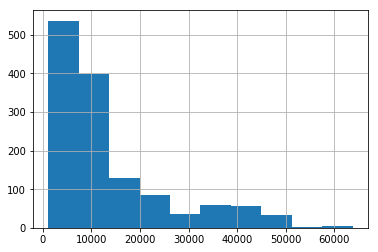

In [10]:
data['expenses'].hist()                  # hist(data$expenses)

In [11]:
data.corr() #by default it takes only numeric values    #cor(data)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


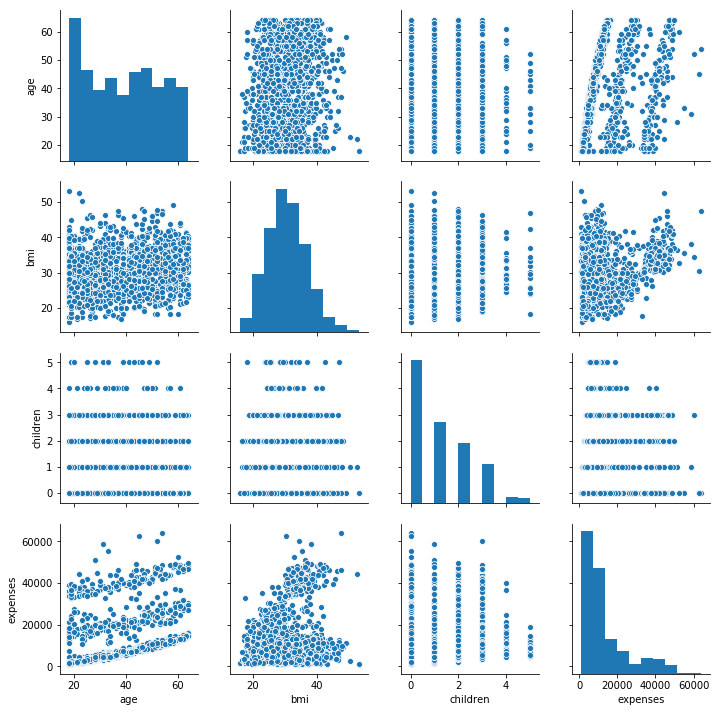

In [12]:
sns.pairplot(data) #by default it takes only numeric values  #similar to pairs.panel(lib(psych))

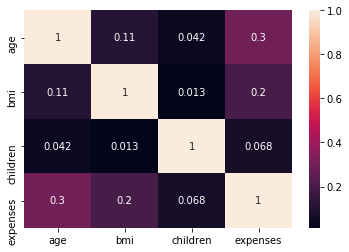

In [13]:
sns.heatmap(data.corr(),annot=True) #by default it takes only numeric values
#bmi and age are more correlated

In [14]:
data['sex']=pd.factorize(data['sex'])[0]
data['smoker']=pd.factorize(data['smoker'])[0]    #asFactors =True
data['region']=pd.factorize(data['region'])[0]

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [16]:
x=data.iloc[:,0:6]
y=data.iloc[:,-1]

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x,y)

In [18]:
import statsmodels.formula.api as sm
model_accu =sm.OLS(y,x).fit()
model_accu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1595.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        00:15:31   Log-Likelihood:                -13599.
No. Observations:                1338   AIC:                         2.721e+04
Df Residuals:                    1332   BIC:                         2.724e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          298.3580     11.625     25.665      0.000     275.552     321.164
sex          383.4876    341.703      1.122      0.262    -286.848    1053.823
bmi          553.9213     18.145     30.528      0.000     518.326     589.517
children     652.6671    141.875      4.600      0.000     374.345     930.989
smoker     -2.249e+04    406.135    -55.379      0.000   -2.33e+04   -2.17e+04
region       874.7741    148.732      5.882      0.000     583.000    1166.548
==============================================================================
Omnibus:                      255.010   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.361
Skew:                           1.124   Prob(JB):                    9.98e-109
Kurtosis:                       4.967   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#next we'll try to increase the accuracy
age2=[]
for age in data['age']:
    age= age*age
    age2.append(age)
data['age2']=age2
data.head()

,age,sex,bmi,children,smoker,region,expenses,age2
0,19,0,27.9,0,0,0,16884.92,361
1,18,1,33.8,1,1,1,1725.55,324
2,28,1,33.0,3,1,1,4449.46,784
3,33,1,22.7,0,1,2,21984.47,1089
4,32,1,28.9,0,1,2,3866.86,1024


In [20]:
x1=data[['age','sex','bmi','children','smoker','region','age2']]

In [21]:
model=lr.fit(x1,y)
model_accu =sm.OLS(y,x1).fit()
model_accu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1403.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        00:15:32   Log-Likelihood:                -13584.
No. Observations:                1338   AIC:                         2.718e+04
Df Residuals:                    1331   BIC:                         2.722e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          564.2604     48.524     11.628      0.000     469.069     659.452
sex          160.1641    340.131      0.471      0.638    -507.087     827.415
bmi          458.6504     24.639     18.615      0.000     410.314     506.987
children     423.5698    146.024      2.901      0.004     137.107     710.033
smoker     -2.307e+04    414.562    -55.657      0.000   -2.39e+04   -2.23e+04
region       644.3508    152.610      4.222      0.000     344.968     943.734
age2          -3.5843      0.635     -5.640      0.000      -4.831      -2.338
==============================================================================
Omnibus:                      270.636   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.691
Skew:                           1.162   Prob(JB):                    1.31e-121
Kurtosis:                       5.141   Cond. No.                     5.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
bmi30=[]
for bmi in data['bmi']:
    if bmi>25:
        bmi30.append('1')
    else:
        bmi30.append('0')
data['bmi30']=bmi30
data.head()

,age,sex,bmi,children,smoker,region,expenses,age2,bmi30
0,19,0,27.9,0,0,0,16884.92,361,1
1,18,1,33.8,1,1,1,1725.55,324,1
2,28,1,33.0,3,1,1,4449.46,784,1
3,33,1,22.7,0,1,2,21984.47,1089,0
4,32,1,28.9,0,1,2,3866.86,1024,1


In [23]:
data['bmi30']=pd.factorize(data['bmi30'])[0]

In [24]:
x2=data[['age','sex','bmi','children','smoker','region','age2','bmi30']]

In [25]:
model=lr.fit(x2,y)
model_accu =sm.OLS(y,x2).fit()
model_accu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1243.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        00:15:32   Log-Likelihood:                -13576.
No. Observations:                1338   AIC:                         2.717e+04
Df Residuals:                    1330   BIC:                         2.721e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          451.2894     55.948      8.066      0.000     341.534     561.045
sex          110.8312    338.466      0.327      0.743    -553.155     774.817
bmi          519.0237     28.798     18.023      0.000     462.529     575.518
children     451.1393    145.377      3.103      0.002     165.946     736.333
smoker     -2.318e+04    413.069    -56.108      0.000    -2.4e+04   -2.24e+04
region       580.8139    152.595      3.806      0.000     281.460     880.168
age2          -2.2022      0.721     -3.056      0.002      -3.616      -0.788
bmi30       2062.6422    516.954      3.990      0.000    1048.508    3076.777
==============================================================================
Omnibus:                      267.779   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.622
Skew:                           1.131   Prob(JB):                    2.75e-125
Kurtosis:                       5.274   Cond. No.                     6.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
data['bmi_smo']=data['bmi30']*data['smoker']
data.head()

,age,sex,bmi,children,smoker,region,expenses,age2,bmi30,bmi_smo
0,19,0,27.9,0,0,0,16884.92,361,0,0
1,18,1,33.8,1,1,1,1725.55,324,0,0
2,28,1,33.0,3,1,1,4449.46,784,0,0
3,33,1,22.7,0,1,2,21984.47,1089,1,1
4,32,1,28.9,0,1,2,3866.86,1024,0,0


In [27]:
x3=data[['age','sex','bmi','children','smoker','region','age2','bmi_smo']]

In [28]:
model=lr.fit(x3,y)
model_accu =sm.OLS(y,x3).fit()
model_accu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1354.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        00:15:33   Log-Likelihood:                -13525.
No. Observations:                1338   AIC:                         2.707e+04
Df Residuals:                    1330   BIC:                         2.711e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          350.0320     50.352      6.952      0.000     251.253     448.811
sex          -66.5033    326.317     -0.204      0.839    -706.656     573.650
bmi          600.3872     26.860     22.352      0.000     547.694     653.081
children     485.4394    139.929      3.469      0.001     210.934     759.944
smoker     -2.448e+04    416.790    -58.725      0.000   -2.53e+04   -2.37e+04
region       539.4899    146.431      3.684      0.000     252.229     826.751
age2          -0.9496      0.654     -1.453      0.146      -2.232       0.333
bmi_smo     6011.2365    544.633     11.037      0.000    4942.803    7079.670
==============================================================================
Omnibus:                      316.026   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.448
Skew:                           1.263   Prob(JB):                    6.77e-169
Kurtosis:                       5.741   Cond. No.                     7.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y_train,y_test=train_test_split(x3,y,test_size=0.25,random_state=0)

In [30]:
model=lr.fit(x3_train,y_train)
y_pred=lr.predict(x3_test)

In [31]:
y_pred.mean()

13421.545115607229

In [32]:
y_test.mean()

13433.77373134328

In [33]:
model_accu =sm.OLS(y,x3).fit()
model_accu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1354.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        00:15:54   Log-Likelihood:                -13525.
No. Observations:                1338   AIC:                         2.707e+04
Df Residuals:                    1330   BIC:                         2.711e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          350.0320     50.352      6.952      0.000     251.253     448.811
sex          -66.5033    326.317     -0.204      0.839    -706.656     573.650
bmi          600.3872     26.860     22.352      0.000     547.694     653.081
children     485.4394    139.929      3.469      0.001     210.934     759.944
smoker     -2.448e+04    416.790    -58.725      0.000   -2.53e+04   -2.37e+04
region       539.4899    146.431      3.684      0.000     252.229     826.751
age2          -0.9496      0.654     -1.453      0.146      -2.232       0.333
bmi_smo     6011.2365    544.633     11.037      0.000    4942.803    7079.670
==============================================================================
Omnibus:                      316.026   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.448
Skew:                           1.263   Prob(JB):                    6.77e-169
Kurtosis:                       5.741   Cond. No.                     7.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

28469079.29936698

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x4=sc.fit_transform(x3)


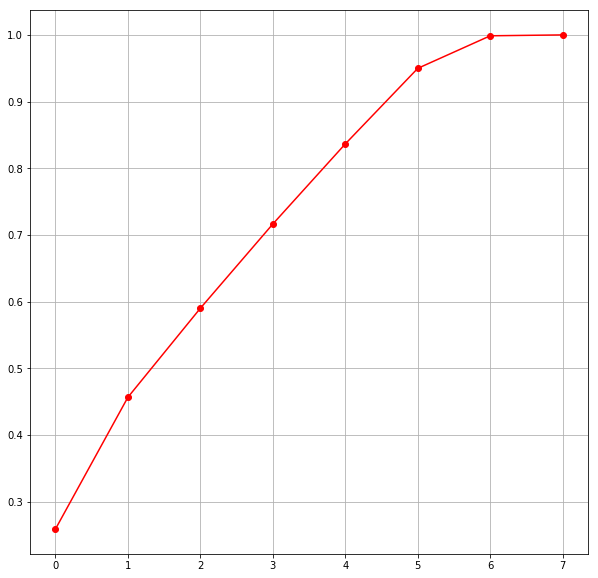

In [35]:
from sklearn.decomposition import PCA
pca=PCA()
x4_pca=pca.fit_transform(x4)
#to find the value of n_counts we plot the graph
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-') #'ro-' is placed to get the exact points in the graph
plt.grid() #grid is given to get the graph with lines


In [36]:
#so now we know the n_components is 6
pca_new=PCA(n_components=6)
x_new=pca_new.fit_transform(x4)
x_new

array([[ 1.64877286, -1.4012137 ,  0.02264785, -0.93369935,  0.27335966,
         2.40910464],
       [ 1.53910049, -1.37055669, -0.22401271,  0.36627458, -0.88815001,
        -0.66940603],
       [ 0.79789923, -1.01979321,  0.04278825,  1.82371538, -0.15419579,
        -0.71036701],
       ...,
       [ 1.40659375, -1.41484149, -1.5497082 , -0.90176397,  0.12756   ,
        -0.11385968],
       [ 1.65624684, -0.49311195, -1.5295154 , -0.56758686, -0.28880532,
         1.02430252],
       [-2.18302556,  0.49791978,  1.07403639, -1.58521272,  0.918222  ,
         1.4687993 ]])

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_,y_test=train_test_split(x_new,y,test_size=0.25,random_state=0)

In [38]:
model=lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)

In [39]:
y_pred1.mean()

13478.816438733007

In [40]:
y_test.mean()

13433.77373134328

In [41]:
model_accu =sm.OLS(y,x_new).fit()
model_accu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     99.76
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          9.74e-104
Time:                        01:33:15   Log-Likelihood:                -14757.
No. Observations:                1338   AIC:                         2.953e+04
Df Residuals:                    1332   BIC:                         2.956e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3003.3112    284.130    -10.570      0.000   -3560.703   -2445.919
x2         -2217.7421    325.031     -6.823      0.000   -2855.370   -1580.114
x3          6299.5375    395.565     15.925      0.000    5523.540    7075.535
x4          -870.7216    406.656     -2.141      0.032   -1668.477     -72.966
x5          2363.8043    416.991      5.669      0.000    1545.775    3181.834
x6          5256.8551    429.311     12.245      0.000    4414.655    6099.055
==============================================================================
Omnibus:                      254.812   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.565
Skew:                           1.111   Prob(JB):                    2.24e-111
Kurtosis:                       5.051   Cond. No.                         1.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""